In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DL Project/train.csv')
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
test= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DL Project/test.csv')
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [5]:
print(train.shape,test.shape)

(990, 194) (594, 193)


In [6]:
missing_values = train.isnull().sum()
missing_values

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [7]:
duplicate_counts = train.duplicated().sum()
duplicate_counts

0

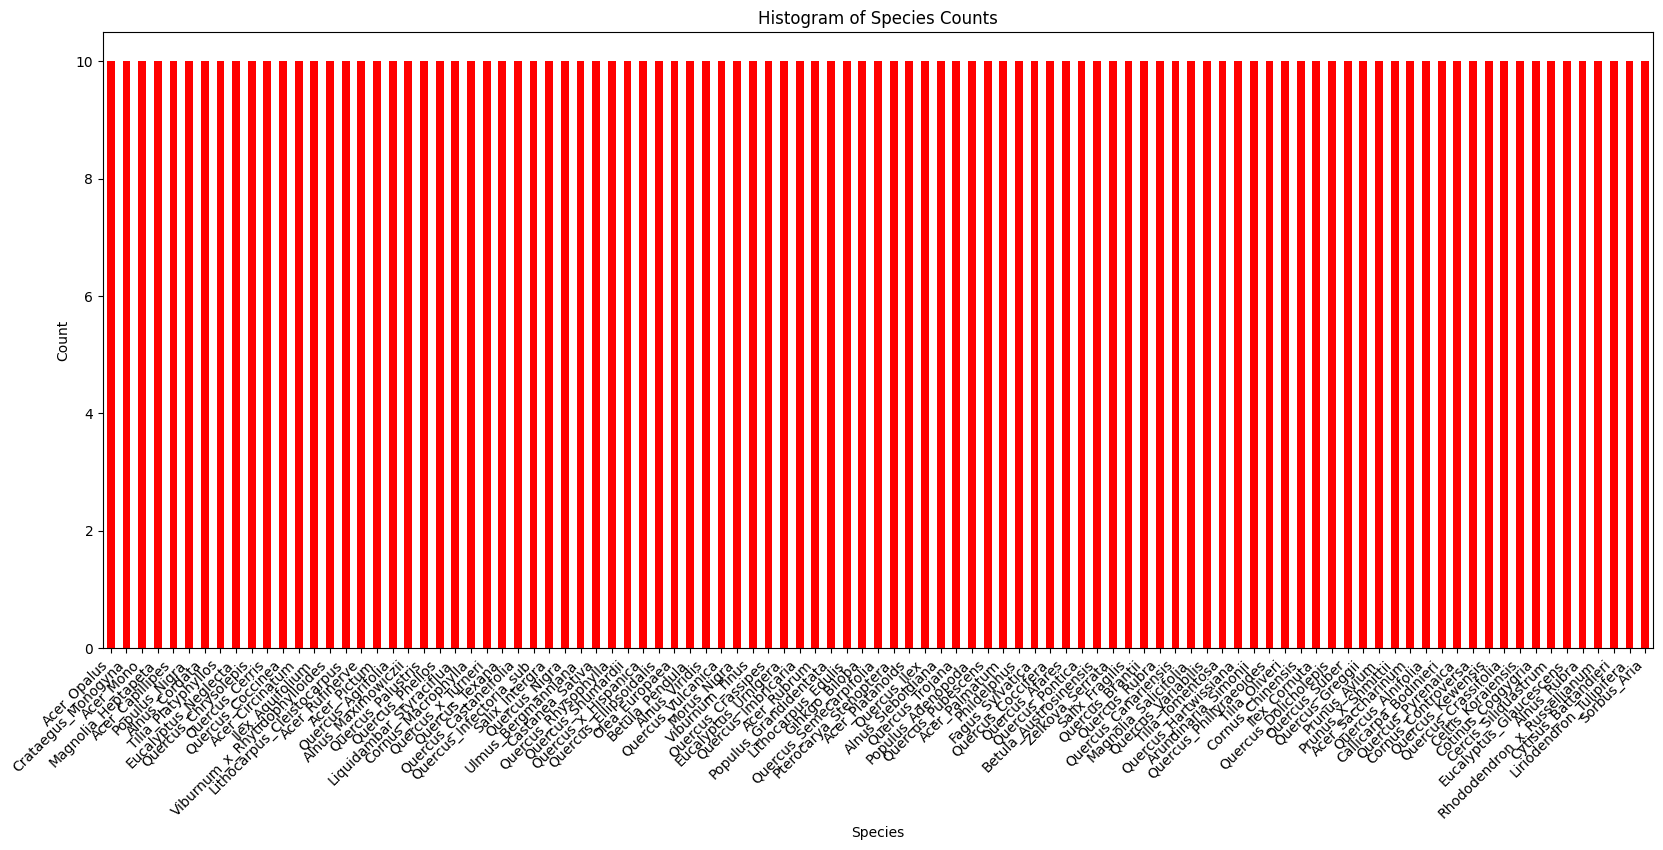

In [10]:
species_counts = train['species'].value_counts()
plt.figure(figsize=(20, 8))
species_counts.plot(kind='bar', color='red')
plt.title('Histogram of Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-14-41b5d7e015f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


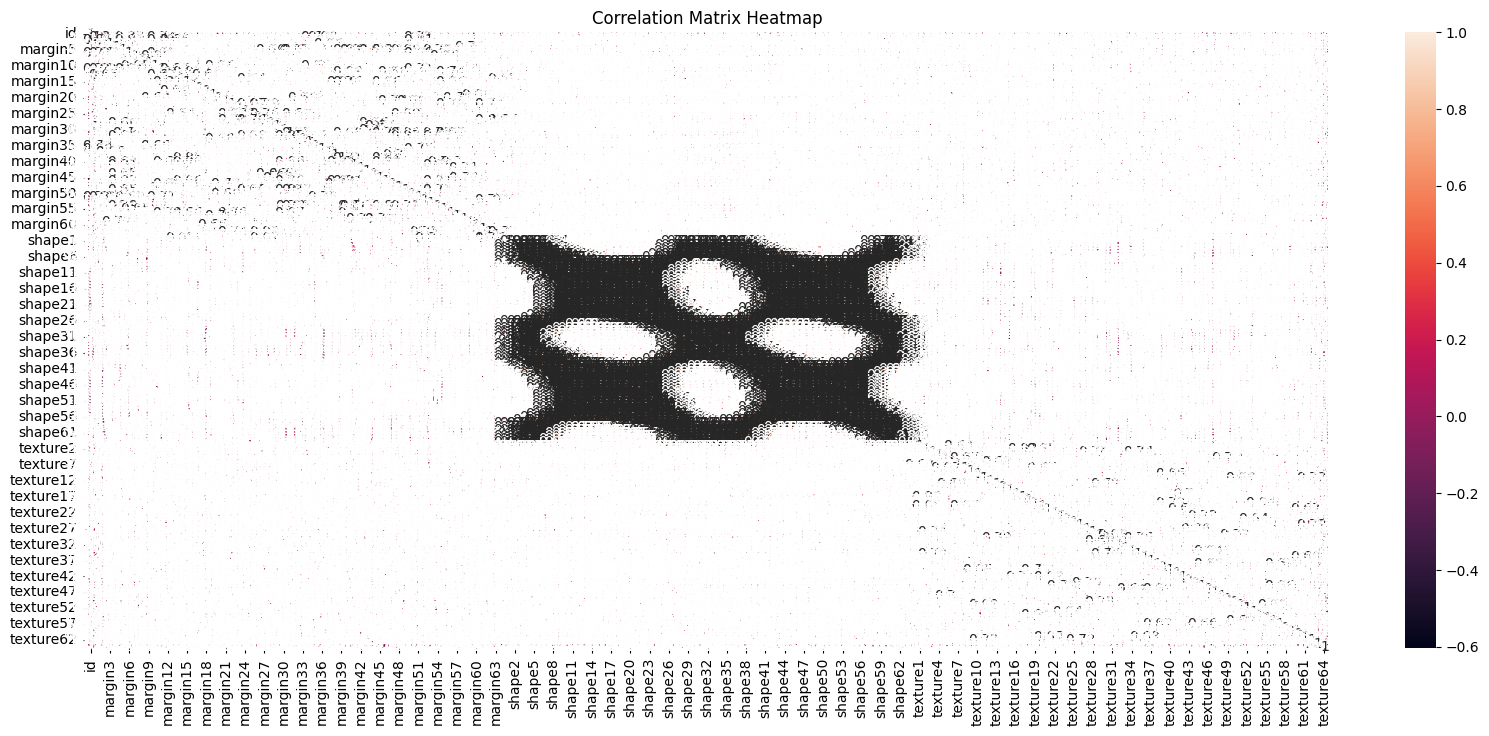

In [14]:
correlation_matrix = train.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
import numpy as np

<ipython-input-18-7ca87957bf33>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


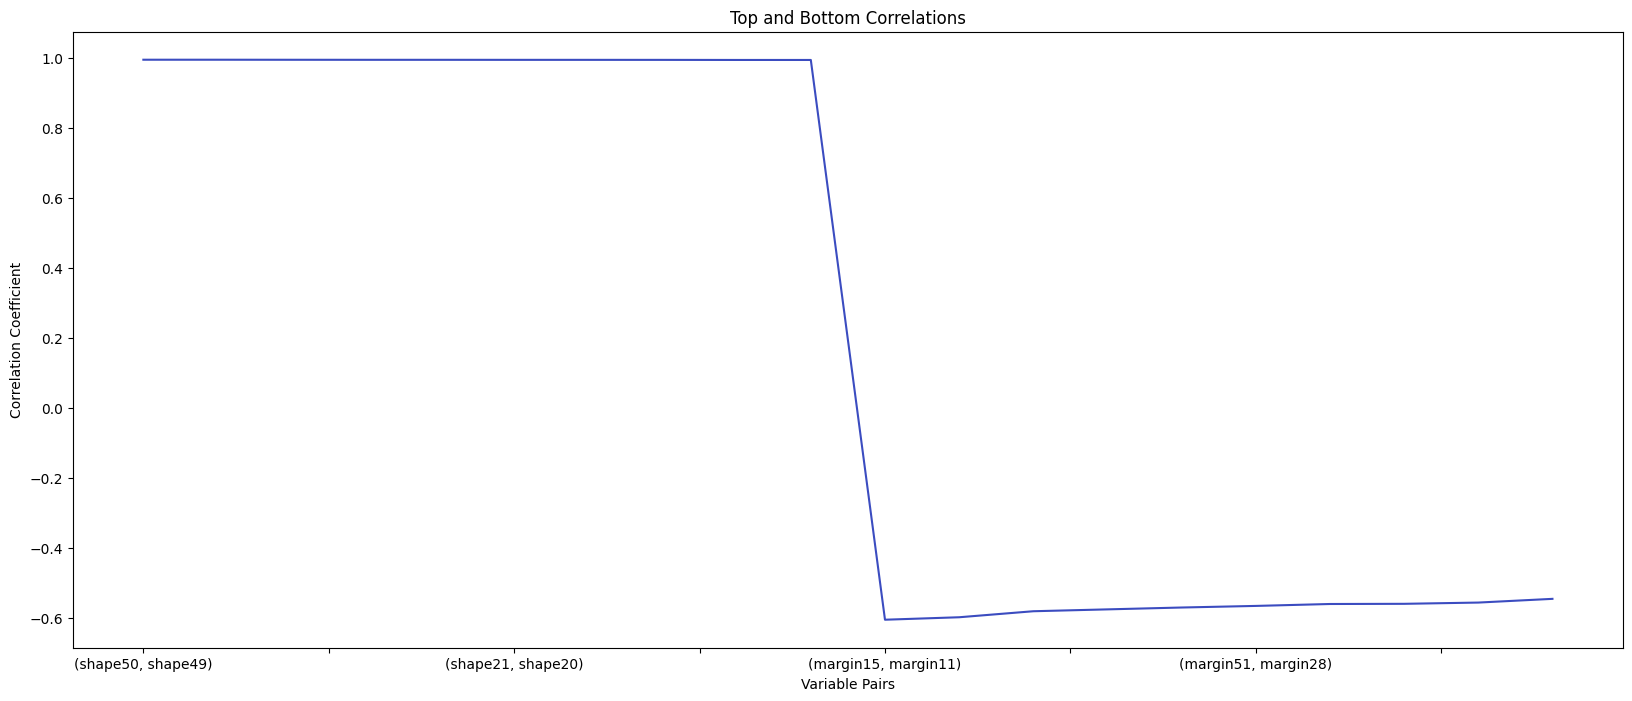

In [18]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
highest_correlations = upper_triangle.unstack().sort_values(ascending=False).head(10)
lowest_correlations = upper_triangle.unstack().sort_values().head(10)
selected_correlations = pd.concat([highest_correlations, lowest_correlations])
plt.figure(figsize=(20, 8))
selected_correlations.plot(kind='line', cmap='coolwarm')
plt.title('Top and Bottom Correlations')
plt.xlabel('Variable Pairs')
plt.ylabel('Correlation Coefficient')
plt.show()

In [19]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
highest_correlations = upper_triangle.unstack().sort_values(ascending=False).head(10)
lowest_correlations = upper_triangle.unstack().sort_values().head(10)
highest_correlations_df = highest_correlations.to_frame(name='Correlation Coefficient')
lowest_correlations_df = lowest_correlations.to_frame(name='Correlation Coefficient')
selected_correlations = pd.concat([highest_correlations, lowest_correlations])
selected_correlations = selected_correlations.to_frame()


<ipython-input-19-cf55ab69760d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [20]:
new_columns = ['correlation']
selected_correlations.columns = new_columns

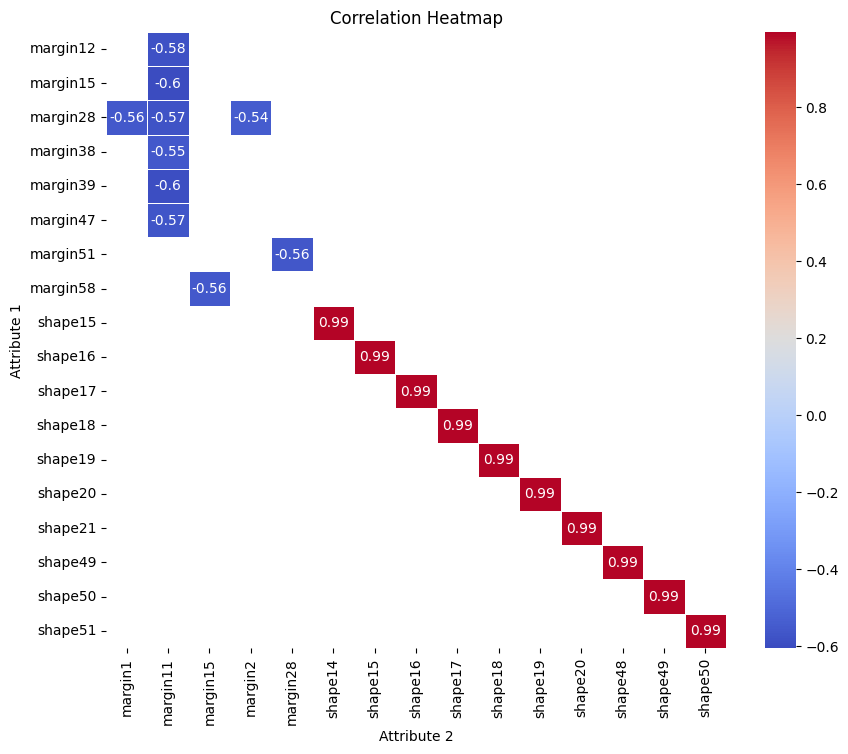

In [21]:
 df = pd.DataFrame(selected_correlations['correlation'], index=pd.MultiIndex.from_tuples(selected_correlations.index, names=['Attribute 1', 'Attribute 2']))
heatmap_data = df.pivot_table(values='correlation', index='Attribute 1', columns='Attribute 2')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()